In [117]:
!pip install mglearn

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape: (26, 2)


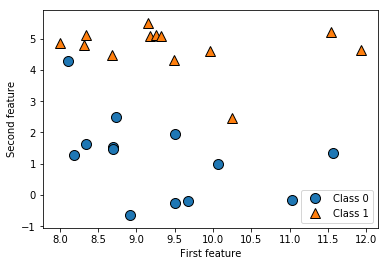

In [119]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.legend(["Class 0","Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))

Text(0,0.5,'Target')

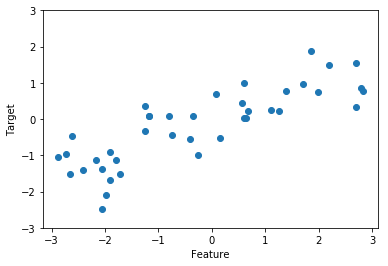

In [83]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [84]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['target_names', 'data', 'DESCR', 'target', 'feature_names'])


In [85]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [86]:
print("Sample counts per class:\n{}".format({n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [87]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [88]:
print(format(cancer.DESCR))

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [89]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [90]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


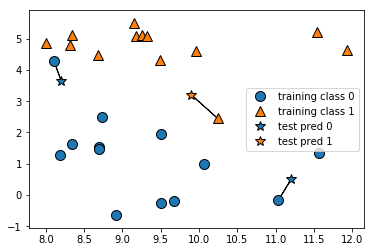

In [91]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


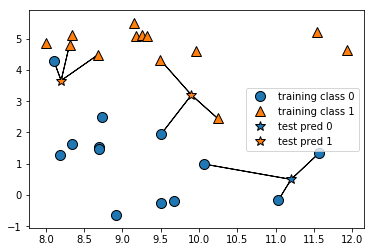

In [92]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [93]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [94]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [95]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [96]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [97]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


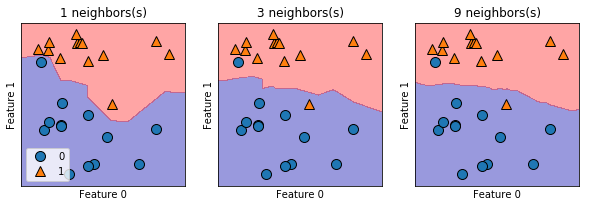

In [98]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method return the object self, so we can instantiate and fit in one line
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbors(s)".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)

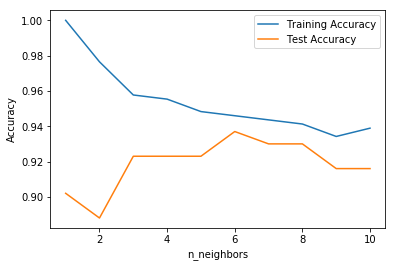

In [99]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    # record trainig set accuracy 
    training_accuracy.append(clf.score(X_train,y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings, training_accuracy, label = "Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

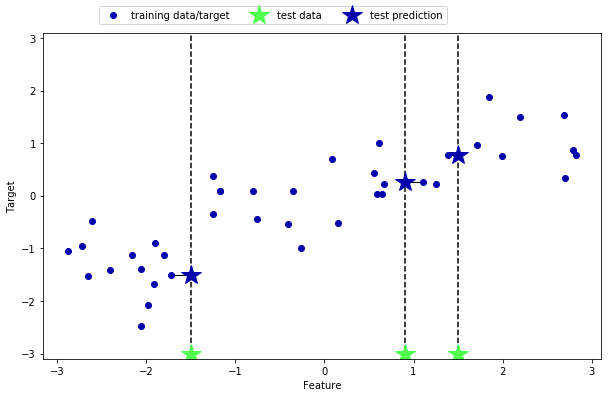

In [100]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

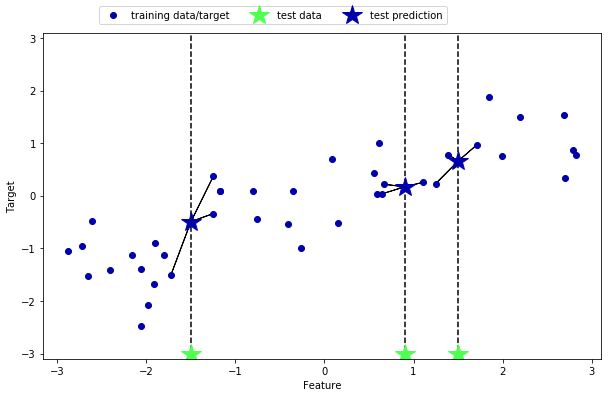

In [101]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

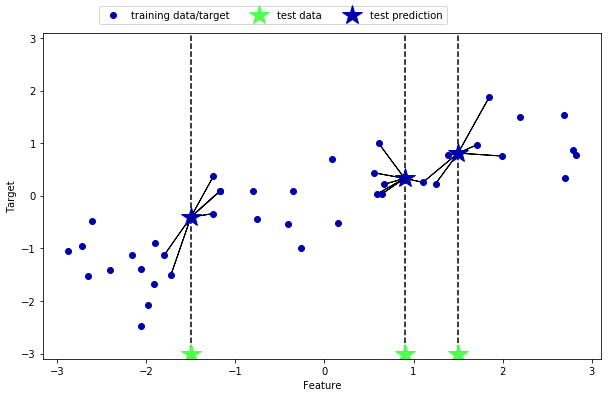

In [102]:
mglearn.plots.plot_knn_regression(n_neighbors=6)

## KNeighborsRegressor

In [103]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# Split the dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

# Instatiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# Fit the model using the training data and training targets 
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [104]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [105]:
print("Test set R^2:{:.2f}".format(reg.score(X_test,y_test)))

Test set R^2:0.83


## Analazing KneighborsRegressor

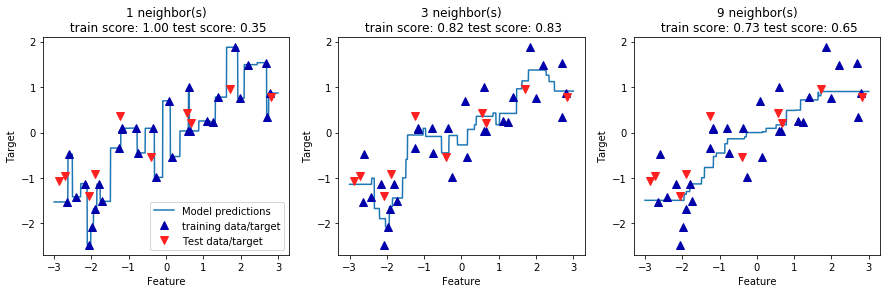

In [106]:
fix, axes = plt.subplots(1,3,figsize=(15,4))
# create 1000 datapoints, evenly spaced between -3 and 3
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors, ax in zip([1,3,9],axes):
    # make predicion using 1,3, or 9 neighbors
    reg=KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train,'^',c=mglearn.cm2(0),markersize=8)
    ax.plot(X_test,y_test,'v',c=mglearn.cm2(1),markersize=8)
    
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions","training data/target", "Test data/target"],loc="best")

## Linear Models

w[0]: 0.393906  b: -0.031804


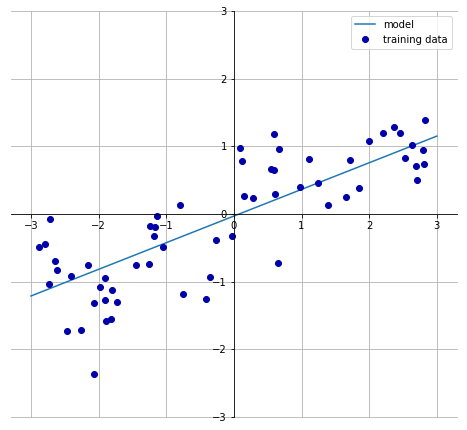

In [107]:
mglearn.plots.plot_linear_regression_wave()

## Linear Regression
### Ordinary Least Square

In [108]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)

# The slope parameters (w), also called weights or coefficients, are stored in the coef_attribute, while the offset or intercept (b) is stored in the intercept_attribute

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [109]:
print("Training set score: {:.2f}".format(lr.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test,y_test)))

Training set score: 0.67
Test set score: 0.66


In [110]:
X,y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
lr=LinearRegression().fit(X_train,y_train)

In [111]:
print("Training set score: {:.2f}".format(lr.score(X_train,y_train)))
print("test set score: {:.2f}".format(lr.score(X_test,y_test)))

Training set score: 0.95
test set score: 0.61


In [112]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test,y_test)))

Training set score: 0.89
Test set score: 0.75


In [113]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [114]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test,y_test)))

Training set score: 0.79
Test set score: 0.64


In [115]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test,y_test)))

Training set score: 0.93
Test set score: 0.77


AttributeError: Unknown property lavel

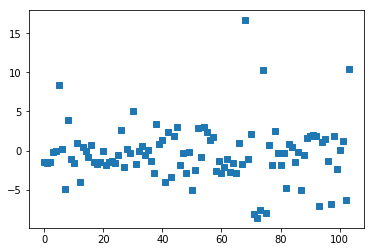

In [116]:
plt.plot(ridge.coef_,'s',label="Ridge alpha = 1")
plt.plot(ridge10.coef_,'^',lavel="Ridge alpha = 10")

## Lasso

In [ ]:
from sklearn.linear_model import Lasso

lasso=Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test,y_test)))
print("Number of feature used: {}".format(np.sum(lasso.coef_ !=0)))

In [ ]:
# We increase the deffault setting of "max_iter"
# Otherwise the model will warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=10000).fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test,y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ !=0)))

In [ ]:
lasso00001 = Lasso(alpha=0.001,max_iter=10000).fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test,y_test)))
print("Number of feature used: {}".format(np.sum(lasso00001.coef_ !=0)))


In [ ]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

## Linear models for classification

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

In [ ]:
mglearn.plots.plot_linear_svc_regularization()

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg=LogisticRegression().fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

In [ ]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test,y_test)))

In [ ]:
logreg0001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print("training set score: {:.3f}".format(logreg0001.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg0001.score(X_test,y_test)))

In [ ]:
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg0001.coef_.T,'v',label="C=0.001")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")
plt.legend()

In [ ]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)

## Linear models for multiclass classification